# Bitcoin Price Prediction
using time series analysis

## 이동평균 (Moving Average)
- 관측된 과거의 데이터를 기반으로 미래를 예측
- 연속적인 미래를 예측하기 위해서는 예측값이 실제로 일어났다고(관측값이라고) 가정하고 예측값 기반으로 또다시 예측해야 함
- 1일 단위로 예측하고, 다음날 실제 관측값을 확인하고, 다시 또 1일 뒤를 예측하고, ...

In [128]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [2]:
df = pd.read_csv('./data/bitcoin_eda.csv', index_col=0)
df.head()

,date,close,volume,fluctuation,weighted_close,close_log,close_norm,volume_norm,weighted_close_norm
0,2013-01-01,13.3,28410.0,-1.55,377853.0,2.587764,0.000000,0.028034,0.000000e+00
1,2013-01-02,13.3,17970.0,0.00,239001.0,2.587764,0.000000,0.017585,0.000000e+00
2,2013-01-03,13.4,18030.0,0.90,241602.0,2.595255,0.000002,0.017645,3.073006e-08
3,2013-01-04,13.5,29640.0,0.75,400140.0,2.602690,0.000003,0.029265,1.019338e-07
4,2013-01-05,13.4,21330.0,-0.44,285822.0,2.595255,0.000002,0.020948,3.648214e-08


### 단순이동평균 (Simple Moving Average)
- 시계열 데이터 $\{X_1, X_2, ...\}$가 수평적 패턴일 때 사용
- $M_t = \frac{1}{N}(X_{t-N+1}+...+X_t)$

In [43]:
# Simple Moving Average, N=4
close_MA4 = df.iloc[:,1].rolling(window=4, min_periods=1).mean()
close_MA8 = df.iloc[:,1].rolling(window=8, min_periods=1).mean()
close_MA16 = df.iloc[:,1].rolling(window=16, min_periods=1).mean()
close_MA32 = df.iloc[:,1].rolling(window=32, min_periods=1).mean()

### 단순이동평균 예측
- 시점 t에서의 단순이동평균: $M_t = \frac{1}{N}(X_{t-N+1}+...+X_t)$
- 시점 t+1에서의 단순이동평균: $M_{t+1}=\frac{1}{N}(X_{t-N+2}+...+X_{t+1})=M_t+\frac{X_{t+1}-X_{t-N+1}}{N}$
- 시점 T에서 시점 T+1 값 예측하기 (한 단계 이후 시점 예측)
    $$f_{T,1}=M_T$$

In [54]:
close_MA4_pred = close_MA4.shift(1)
close_MA8_pred = close_MA8.shift(1)
close_MA16_pred = close_MA16.shift(1)
close_MA32_pred = close_MA32.shift(1)

### 단순이동평균 시각화

* N이 커질수록 평활 효과가 커짐
    - 더 완만한 곡선
    - 평활 효과에 비례한 time lag 발생

In [75]:
# 그래프 시각화 함수
def draw_122_lineplot(data_base, data_li1, data_li2, legend_li1, legend_li2,
                      xlim_start, xlim_end, figure_size=(15,5)):
    total_data = [data_li1, data_li2]
    total_legend = [legend_li1, legend_li2]
    plt.figure(figsize=figure_size)
    
    for i, (datalist, datalegend) in enumerate(zip(total_data, total_legend)):
        plt.subplot(1, 2, i+1)
        data_base.plot(lw=3)
        _ = [d.plot() for d in datalist]
        plt.legend(['close']+datalegend)
        plt.xlim(xlim_start, xlim_end)
    
    plt.show()

In [ ]:
close_MA_li = [close_MA4, close_MA8, close_MA16, close_MA32]
close_MA_pred_li = [close_MA4_pred, close_MA8_pred, close_MA16_pred, close_MA32_pred]
close_MA_legend = ['close_MA4', 'close_MA8', 'close_MA16', 'close_MA32']
close_MA_pred_legend = ['close_MA4_pred', 'close_MA8_pred', 'close_MA16_pred', 'close_MA32_pred']

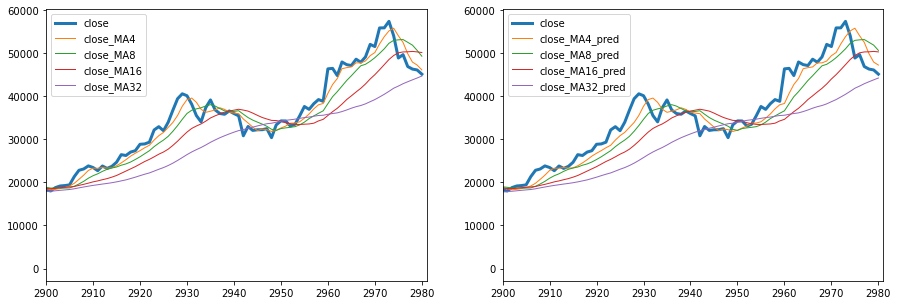

In [91]:
draw_122_lineplot(df['close'],
                  close_MA_li, close_MA_pred_li,
                  close_MA_legend, close_MA_pred_legend,
                  2900, len(df))

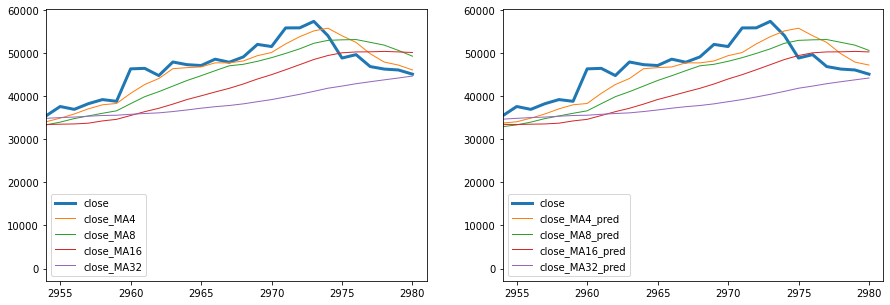

In [77]:
draw_122_lineplot(df['close'],
                  close_MA_li, close_MA_pred_li,
                  close_MA_legend, close_MA_pred_legend,
                  2954, len(df))

### Double Moving Average
이중이동평균 (Double Moving Average)
- 시계열 데이터 $\{X_1, X_2, ...\}$가 추세 패턴을 따를 때 사용

시계열이 다음과 같이 선형추세를 갖는다고 가정하자.

$$X_t = c + bt + a_t$$
- 단순이동평균 $M_t$는 추세를 늦게 따라감
    - $E[M_t] = c + bt - \frac{N-1}{2}b \Rightarrow E[M_t]+\frac{N-1}{2}b=c+bt$
- 이를 보정하기 위해 이중 이동평균을 활용
  
$$M_t = \frac{1}{N}(X_{t-N+1}+...+X_t)$$
$$M_t^{(2)} = \frac{1}{N}(M_{t-N+1}+...+M_t)$$
$$E[M_t^{(2)}]=c+bt-(N-1)b$$
$$E[M_t]-E[M_t^{(2)}]=\frac{N-1}{2}b$$

In [78]:
# Double Moving Average, N=4, 8, 16, 32
close_DMA4 = close_MA4.rolling(window=4, min_periods=1).mean()
close_DMA8 = close_MA8.rolling(window=8, min_periods=1).mean()
close_DMA16 = close_MA16.rolling(window=4, min_periods=1).mean()
close_DMA32 = close_MA32.rolling(window=8, min_periods=1).mean()

### Double Moving Prediction

시점 T에서 1단계 이후 예측하기
$$f_{T,1}=E[X_{T+1}|X_T, X_{T-1},...]=c+b(T+1)$$
$$\hat{f}_{T,1}=\hat{c}+\hat{b}(T+1)=2M_T-M_T^{(2)}+\hat{b}$$
$$\hat{b}=\frac{2}{N-1}(M_T-M_T^{(2)})$$

시점 T에서 k단계 이후 예측하기
$$f_{T,k}=E[X_{T+1}|X_T, X_{T-1},...]=c+b(T+k), k=1,2,...$$
$$\hat{f}_{T,1}=\hat{c}+\hat{b}(T+k)=2M_T-M_T^{(2)}+k\hat{b}$$


In [129]:
def dma_pred(ma, dma, window_size, timestep=1):
    return 2 * ma - dma + timestep * (2/(window_size-1)*(ma-dma))

In [85]:
close_DMA4_pred = dma_pred(close_MA4, close_DMA4, 4).shift(1)
close_DMA8_pred = dma_pred(close_MA8, close_DMA8, 8).shift(1)
close_DMA16_pred = dma_pred(close_MA16, close_DMA16, 16).shift(1)
close_DMA32_pred = dma_pred(close_MA32, close_DMA32, 32).shift(1)

### 이중이동평균 시각화

In [86]:
close_DMA_li = [close_DMA4, close_DMA8, close_DMA16, close_DMA32]
close_DMA_pred_li = [close_DMA4_pred, close_DMA8_pred, close_DMA16_pred, close_DMA32_pred]
close_DMA_legend = ['close_DMA4', 'close_DMA8', 'close_DMA16', 'close_DMA32']
close_DMA_pred_legend = ['close_DMA4_pred', 'close_DMA8_pred', 'close_DMA16_pred', 'close_DMA32_pred']

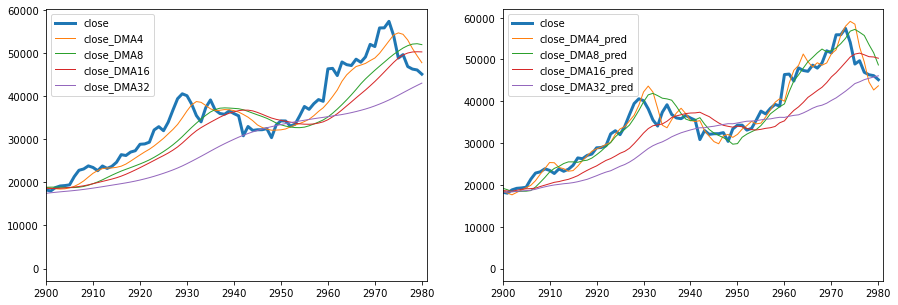

In [90]:
draw_122_lineplot(df['close'],
                  close_DMA_li, close_DMA_pred_li,
                  close_DMA_legend, close_DMA_pred_legend,
                  2900, len(df))

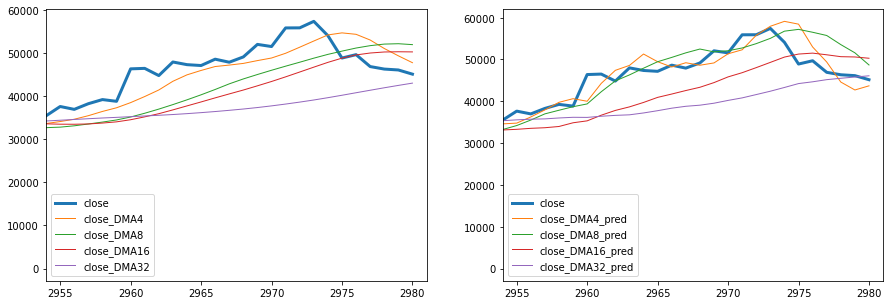

In [88]:
draw_122_lineplot(df['close'],
                  close_DMA_li, close_DMA_pred_li,
                  close_DMA_legend, close_DMA_pred_legend,
                  2954, len(df))

# Simple MA prediction vs. Double MA prediction

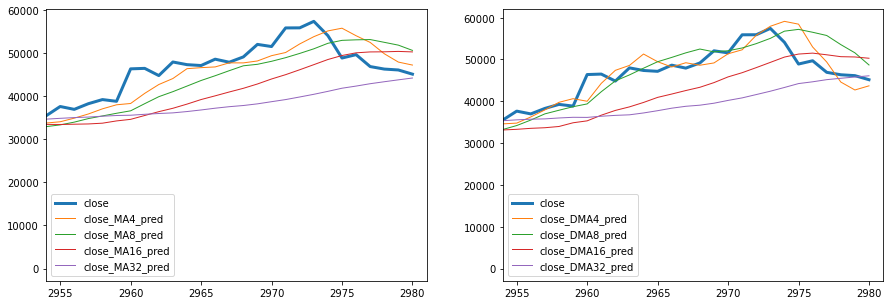

In [93]:
draw_122_lineplot(df['close'],
                  close_MA_pred_li, close_DMA_pred_li,
                  close_MA_pred_legend, close_DMA_pred_legend,
                  2954, len(df))

### 예측 성능 척도/ 예측 오차 (한단계 예측 기준)
- 특정 시점 T에서 T+1 시점을 예측하고, 실제 T+1 시점 실제값과 비교하여 예측오차 산출

$$e_{t,1}=X_{t+1}-f_{t,1}$$

- 총 n개 시점에서 예측 오차를 산출하는 경우, 다음과 같은 척도가 사용됨
    - $MSE = \frac{1}{n}\sum^n_{t=1}e^2_{t,1}$
    - $RMSE = \sqrt{\frac{1}{n}\sum^n_{t=1}e^2_{t,1}}$
    - $MAD = \frac{1}{n}\sum^n_{n=1}|e_{t,1}|$
    - $MAPE = \frac{100}{n}\sum^{n}_{t=1}|\frac{e_{t,1}}{X_{t+1}}|$

In [111]:
def calc_mse(errors):
    return np.mean(errors**2)

def calc_rmse(errors):
    return np.sqrt(calc_mse(errors))

In [112]:
close_MA_MSE_list = [calc_mse(df['close'].shift(1) - MA_pred)
                     for MA_pred in close_MA_pred_li]
close_MA_RMSE_list = [calc_rmse(df['close'].shift(1) - MA_pred)
                     for MA_pred in close_MA_pred_li]
close_DMA_MSE_list = [calc_mse(df['close'].shift(1) - DMA_pred)
                     for DMA_pred in close_DMA_pred_li]
close_DMA_RMSE_list = [calc_rmse(df['close'].shift(1) - DMA_pred)
                     for DMA_pred in close_DMA_pred_li]

In [117]:
close_DMA_MSE_list

[131215.78411359893, 265809.9474269304, 701977.2842255655, 1646824.344325758]

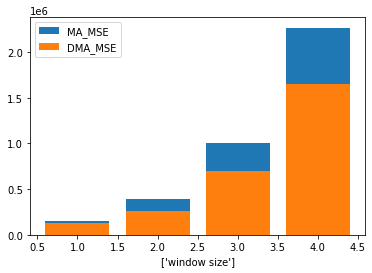

In [126]:
plt.bar([1,2,3,4], close_MA_MSE_list)
plt.bar([1,2,3,4], close_DMA_MSE_list)
plt.xlabel(['window size'])
plt.legend(['MA_MSE', 'DMA_MSE'])
plt.show()

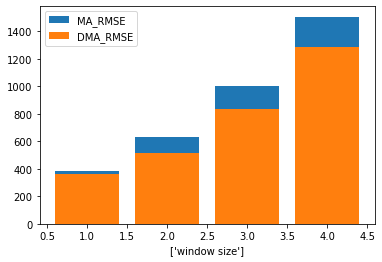

In [182]:
plt.bar([1,2,3,4], close_MA_RMSE_list)
plt.bar([1,2,3,4], close_DMA_RMSE_list)
plt.xlabel(['window size'])
plt.legend(['MA_RMSE', 'DMA_RMSE'])
plt.show()

## 지수평활법 (Exponential Smoothing)
- 평활치를 구하는데 전체 데이터를 사용하며, 시간에 따라 다른 가중치를 부여함
- 가중치는 과거로 갈수록 지수적으로 감소

### https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

- It is straightforward to observe that SMA timeseries are much less noisy than the original price timeseries. However, this comes at a cost: SMA timeseries lag the original price timeseries, which means that changes in the trend are only seen with a delay (lag) of L days.
- How much is this lag L? For a SMA moving average calculated using M days, the lag is roughly M2
 days. Thus, if we are using a 100 days SMA, this means we may be late by almost 50 days, which can significantly affect our strategy.
- One way to reduce the lag induced by the use of the SMA is to use the so-called Exponential Moving Average (EMA), defined as

---

The reason why EMA reduces the lag is that it puts more weight on more recent observations, whereas the SMA weights all observations equally by 1M. Using Pandas, calculating the exponential moving average is easy. We need to provide a lag value, from which the decay parameter α is automatically calculated. To be able to compare with the short-time SMA we will use a span value of 20.


### Simple Exponential MA
- 시계열 데이터 $\{X_1, X_2, ...\}$가 수평적 패턴일 때 사용
- 시점 t의 지수평활치
$$S_t = \alpha X_t + \alpha (1- \alpha)X_{t-1}+\alpha(1-\alpha)^2X_{t-2}+...$$
- 시점 t+1의 지수평활치
$$S_{t+1}=\alpha X_{t+1}+(1-\alpha)S_t$$
- 평활상수 $\alpha \ (0< \alpha < 1)$가 작을수록 평활효과 큼
- 시점 t로부터 t+1의 값 예측 (한단계 이후 예측)
$$f_{t,1}=S_t$$
- 최근 추세를 반영하여 예측하고자 하면 큰 $\alpha$를 사용
- 전체 평균으로 예측하고자 하면 작은 $\alpha$ 사용


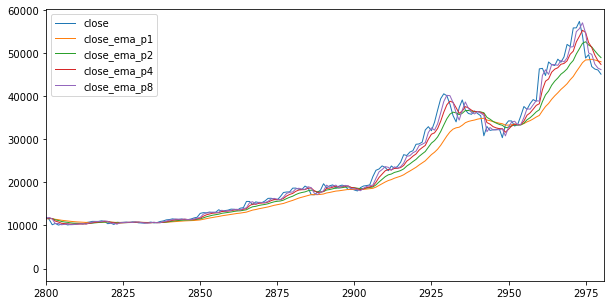

In [164]:
close_EMA_li = [df['close'].ewm(alpha=a, adjust=False).mean()
                     for a in [0.1, 0.2, 0.4, 0.8]]
close_EMA_pred_li = [ema.shift(1) for ema in close_EMA_li]

plt.figure(figsize=(10,5))
df['close'].plot()
_ = [ema.plot() for ema in close_EMA_pred_li]
plt.xlim(2800, len(df))
plt.legend(['close', 'close_ema_p1', 'close_ema_p2', 'close_ema_p4',
           'close_ema_p8'])

### Double MA vs. Simple Exponential MA

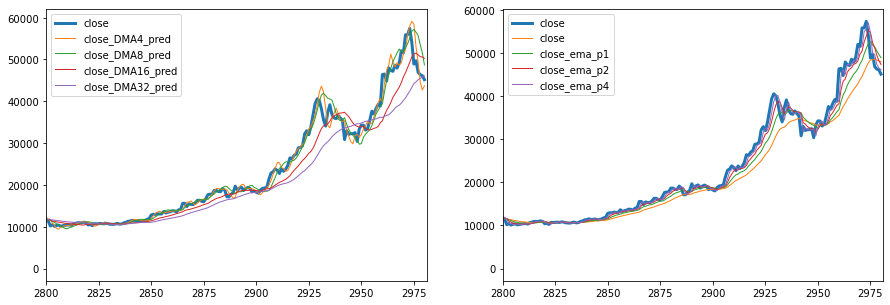

In [161]:
close_EMA_pred_legend = ['close', 'close_ema_p1', 'close_ema_p2', 'close_ema_p4',
           'close_ema_p8']
draw_122_lineplot(df['close'],
                  close_DMA_pred_li, close_EMA_pred_li,
                  close_DMA_pred_legend, close_EMA_pred_legend,
                  2800, len(df))

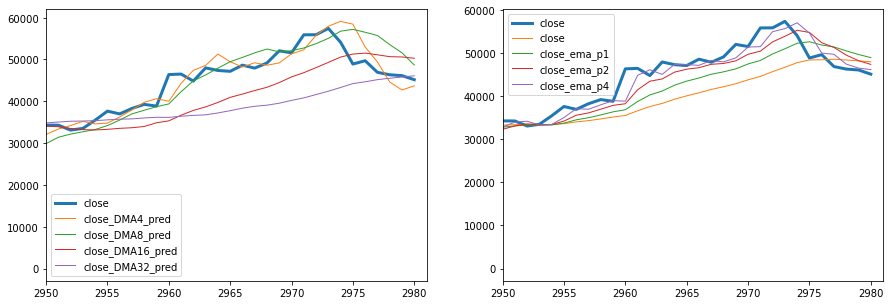

In [162]:
close_EMA_pred_legend = ['close', 'close_ema_p1', 'close_ema_p2', 'close_ema_p4',
           'close_ema_p8']
draw_122_lineplot(df['close'],
                  close_DMA_pred_li, close_EMA_pred_li,
                  close_DMA_pred_legend, close_EMA_pred_legend,
                  2950, len(df))

### Double Exponential MA
- 시계열 데이터 $\{X_1, X_2, ...\}$가 추세 패턴을 따르는 경우 사용
$$X_t = c+bt+a_t$$
- 단순 지수평활치 기대치와 시계열 기대치 간에는 격차가 존재함

$$E[S_t]=c+bt-\frac{1-\alpha}{\alpha}b \Rightarrow E[S_t]+\frac{1-\alpha}{\alpha}b=c+bt$$

- 이를 보정하기 위하여 이중 지수평활을 사용
- (Brown) 이중 지수평활

$$S_t = \alpha X_t + (1-\alpha)S_{t-1} \\
S_t^{(2)}=\alpha S_t+(1-\alpha)S_{t-1}^{(2)} \\
E[S_t^{(2)}]=E[S_t]-\frac{1-\alpha}{\alpha}b \\
E[S_t]-E[S_t^{(2)}]=\frac{1-\alpha}{\alpha}b
$$

#### 예측
- 시점 T에서 다음 시점의 예측치 (한단계 이후 예측)
$$f_{T,1}=E[X_{T+1}|X_T,X_{T-1},...]=c+b(T+1) \\
\hat{f}_{T,1}=\hat{c}+\hat{b}(T+1)=2S_T-S_T^{(2)}+\hat{b} \\
\hat{b}=\frac{\alpha}{1-\alpha}(S_T-S_T^{(2)})
$$

- k단계 이후 예측치

$$f_{T,k}=E[X_{T+k}|X_T,X_{T-1},...]=c+b(T+k), k=1,2,... \\
\hat{f}_{T,k}=\hat{c}+\hat{b}(T+k)=2S_T-S_T^{(2)}+k\hat{b} \\
$$

In [171]:
def calc_dema(sema, alpha, timestep=1):
    dema = sema.ewm(alpha=alpha, adjust=False).mean()
    return 2 * sema - dema + timestep * (alpha/(1-alpha)*(sema-dema))

In [172]:
close_DEMA_pred_li = [calc_dema(ema, alpha).shift(1)
                     for alpha, ema in zip([0.1, 0.2, 0.4, 0.8]
                                             ,close_EMA_li)]

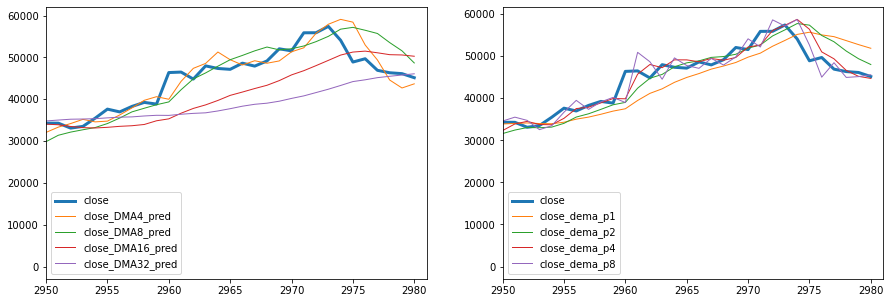

In [177]:
close_DEMA_pred_legend = ['close_dema_p1', 'close_dema_p2', 'close_dema_p4',
           'close_dema_p8']
draw_122_lineplot(df['close'],
                  close_DMA_pred_li, close_DEMA_pred_li,
                  close_DMA_pred_legend, close_DEMA_pred_legend,
                  2950, len(df))

### 오차 측정
- Double EMA : alpha=0.4에서 RMSE 최소 (194)

In [173]:
close_DEMA_MSE_list = [calc_mse(df['close'].shift(1) - DEMA_pred)
                     for DEMA_pred in close_DEMA_pred_li]
close_DEMA_RMSE_list = [calc_rmse(df['close'].shift(1) - DEMA_pred)
                     for DEMA_pred in close_DEMA_pred_li]

##### plt.bar([1,2,3,4], close_DMA_RMSE_list)
plt.bar([1,2,3,4], close_DEMA_RMSE_list)
plt.xlabel('order by window size(DMA) / alpha(DEMA)')
plt.legend(['DMA_RMSE', 'DEMA_RMSE'])
plt.show()

In [183]:
close_DEMA_RMSE_list[2]

194.23375426783545

## Trading Strategy using Moving Average
- https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/
- https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d